In [1]:
from IPython.core.magic import register_cell_magic
from IPython.core.magic import register_line_magic

import time
import requests
import json
import time

In [53]:
from IPython.display import display, Image
import base64

@register_cell_magic
def run_remote(line, cell):
    url = 'http://scigap02.sciencegateways.iu.edu:18880/api/v1/agent/executejupyterrequest'

    data = {
        "sessionId": "session1",
        "keepAlive": True,
        "code": cell,
        "agentId": "agent1991"
    }

    json_data = json.dumps(data)    
    response = requests.post(url, headers={'Content-Type': 'application/json'}, data=json_data)
    execution_resp = response.json()
    execution_id = execution_resp["executionId"]
    error = execution_resp["error"]
    if error:
        print("Cell execution failed. Error: " + error)
    if execution_id:
        while True:
            url = "http://scigap02.sciencegateways.iu.edu:18880/api/v1/agent/executejupyterresponse/" + execution_id
            response = requests.get(url, headers={'Accept': 'application/json'})
            json_response = response.json()
            #print(json_response)
            if json_response['available']:
                result_str = json_response['responseString']
                result = json.loads(result_str)
                if 'result' in result:
                    print(result['result'])
                elif 'error' in result:
                    print(result['error']['ename'])
                    print(result['error']['evalue'])
                    print(result['error']['traceback'])
                elif 'display' in result:
                    display_obj = result['display']
                    if 'data' in display_obj:
                        data_obj = display_obj['data']
                        if 'image/png' in data_obj:
                            image_data = data_obj['image/png']
                            display(Image(data=base64.b64decode(image_data), format='png'))
                break
            time.sleep(1)

@register_line_magic
def init_remote(line):
    print(f"Your input: {line}")
    pairs = line.split()

    # Initialize variable to store the cluster value
    cluster_value = None
    
    # Iterate through the pairs to find the cluster value
    for pair in pairs:
        if pair.startswith("cluster="):
            cluster_value = pair.split("=")[1]
            break
    
    # Print the cluster value
    if cluster_value:
        print(f"Cluster value: {cluster_value}")

    

@register_line_magic
def terminate_remote(line):
    print(f"Your input: {line}")

In [51]:
%init_remote cluster=jetstream cpu=2 memory=2GB queue=shared walltime=60

Your input: cluster=jetstream cpu=2 memory=2GB
Cluster value: jetstream


In [59]:
%%run_remote
# Your code here
a = 10
print(a)

10



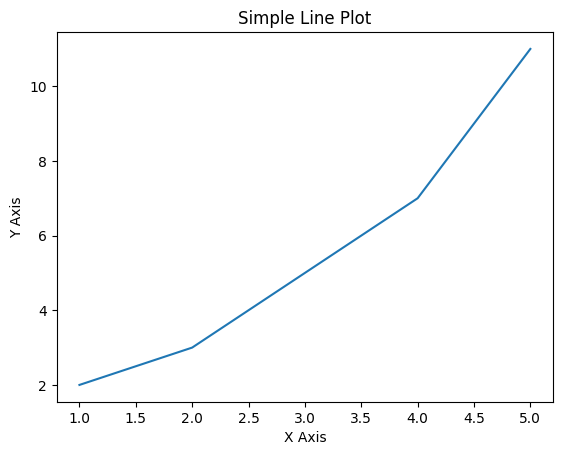

In [60]:
%%run_remote
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create the plot
plt.plot(x, y)

# Add a title and labels
plt.title('Simple Line Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Show the plot
plt.show()

In [57]:
%%run_remote
!pip3 install matplotlib



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip



In [38]:
%%run_remote cluster=jetstream cpu=2 memory=2GB
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip



In [43]:
%terminate_remote

Your input: 
